# Binary Classification
#### Libraries Used 
    Pandas 
    Numpy 
    Matplotlib.pyplot 
    Seaborn 
    sklearn.preprocessing 
    sklearn.linear_model 
    sklearn.metrics 
    sklearn.RobustScaler 
    sklearn.decomposition import PCA 
    
#### Data Understanding
    shape of data
    information of data
    Description of data
    Checking Null values in data
    
#### Data Cleaning 
    Manipulating the input columns(X56, X57) data type to float because Accept trees algo's all remaining algorithm in ML allows float input data 
    Validating for outliers using IQR and removing them using Capping method 
    
#### Data Preprocessing
    Using Robust Scaler to scale the input data 
        Both Standard Scalers and robust scaler transform input to comparable scales. The difference is , std scaler used mean and std dev however Robust scaler uses Median and IQR instead. 
    Feature Selection and Extraction using PCA 

#### Model Selection 
    We select Logistic Regression Model For Binary Classification. 
    
#### Apply model have 3 cases: 
    Apply model on Raw data 
    Apply model on data having no outlier and scaled data 
    Apply model on scales and reduced number of columns 
    
#### Validating 
    Checking Accuracy on different applications of model 
    Finding Confusion metrics
    
#### Classification metrics

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Training_data = pd.read_csv("training_set.csv",index_col=0)
Testing_data = pd.read_csv("test_set.csv",index_col=0)

In [3]:
Testing_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [4]:
Training_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [5]:
# Creating copy of original dataset to secure our data form information loss
Training_data_copy = Training_data.copy()
Training_data_copy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [6]:
Testing_data_copy = Testing_data.copy()

In [7]:
Training_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [8]:
Testing_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 690
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      691 non-null    float64
 1   X2      691 non-null    float64
 2   X3      691 non-null    float64
 3   X4      691 non-null    float64
 4   X5      691 non-null    float64
 5   X6      691 non-null    float64
 6   X7      691 non-null    float64
 7   X8      691 non-null    float64
 8   X9      691 non-null    float64
 9   X10     691 non-null    float64
 10  X11     691 non-null    float64
 11  X12     691 non-null    float64
 12  X13     691 non-null    float64
 13  X14     691 non-null    float64
 14  X15     691 non-null    float64
 15  X16     691 non-null    float64
 16  X17     691 non-null    float64
 17  X18     691 non-null    float64
 18  X19     691 non-null    float64
 19  X20     691 non-null    float64
 20  X21     691 non-null    float64
 21  X22     691 non-null    float64
 22  X2

In [9]:
print(Training_data_copy.shape)
print(Testing_data_copy.shape)

(3910, 58)
(691, 57)


In [10]:
Training_data_copy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [11]:
Testing_data_copy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,...,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,...,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,...,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,4.540000,14.280000,5.100000,35.460000,10.000000,5.880000,5.400000,4.620000,5.260000,4.540000,...,2.560000,4.121000,2.941000,4.081000,5.803000,1.357000,3.879000,664.000000,1327.000000,15841.000000


# Data Validating

In [12]:
# Checking Training data for Null Values
Training_data_copy.isnull().values.sum()

0

In [13]:
# Changing Data type of input columns to Float in training data
Training_data_copy["X56"] = Training_data_copy["X56"].astype(dtype=float)

In [14]:
Training_data_copy["X57"] = Training_data_copy["X57"].astype(dtype=float)

In [15]:
Training_data_copy[['X56','X57']].dtypes

X56    float64
X57    float64
dtype: object

In [16]:
# Doing same for Testing data input columns
Testing_data_copy[['X56','X57']] = Testing_data_copy[['X56','X57']].astype(dtype=float)

In [17]:
Testing_data_copy[['X56','X57']].dtypes

X56    float64
X57    float64
dtype: object

# Apply Logistic Regression Directly without cleaning

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
# independent Variable
x1 = Training_data_copy.iloc[:,0:-1]
x1.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.000,0.0,1.342,0.0,0.000,1.200,2.0,12.0
1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,...,0.0,0.0,0.083,0.0,0.503,0.0,0.083,16.304,148.0,375.0


In [20]:
y1 = Training_data_copy["Y"]
y1.head(2)

0    0
1    1
Name: Y, dtype: int64

In [21]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=30)

In [22]:
log_reg = LogisticRegression()

In [23]:
#Training of model
log_reg.fit(x1_train,y1_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y1_pred = log_reg.predict(x1_test)

In [25]:
comp_data = pd.DataFrame({"Original_Y1":y1_test,
                         "Predicted_Y1":y1_pred})
comp_data

,Original_Y1,Predicted_Y1
915,0,0
3898,0,0
1653,0,1
1336,0,0
3900,1,1
...,...,...
3259,0,0
2496,1,1
761,0,0
1087,1,0


In [26]:
cnf_matrix1 = metrics.confusion_matrix(y1_test, y1_pred)
cnf_matrix1

array([[651,  40],
       [ 58, 424]], dtype=int64)

In [27]:
##From the confusion matrix we can see that:

    #True positive predictions: 651
    #True negative predictions: 424
    #False positive predictions: 58
    #False negative predictions: 40

In [28]:
Accuracy_y1 = metrics.accuracy_score(y1_test, y1_pred)
Accuracy_y1

0.9164535379369139

# Apply Logistic Regression after Data Cleaning and Preprocessing

### Data Cleaning

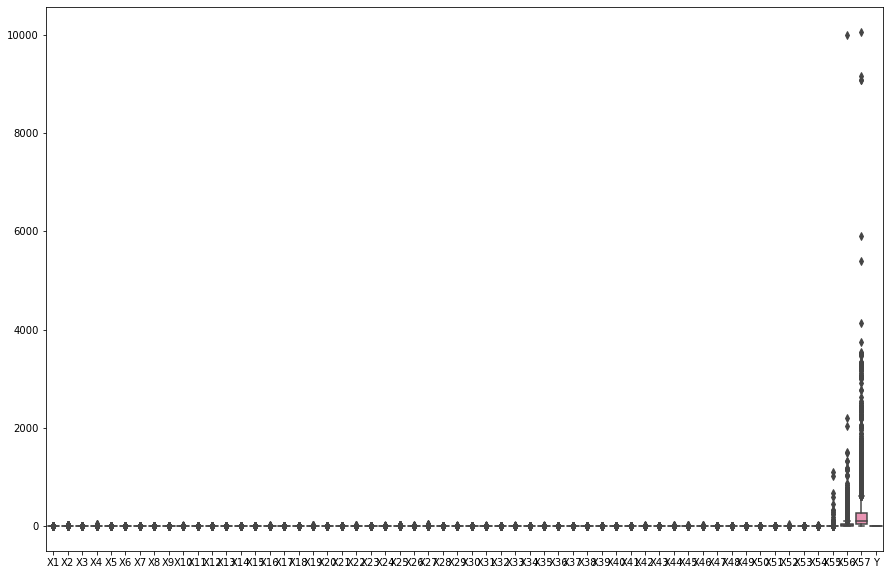

In [29]:
# Visualize the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=Training_data_copy)
plt.show()

Finding Outliers in our dataset \
We are able to visualize using data describe function and Boxplot that our col_name[X55,X56,X57] has very \
high Variance. So,we consider outliers in last 3 columns.

<AxesSubplot:>

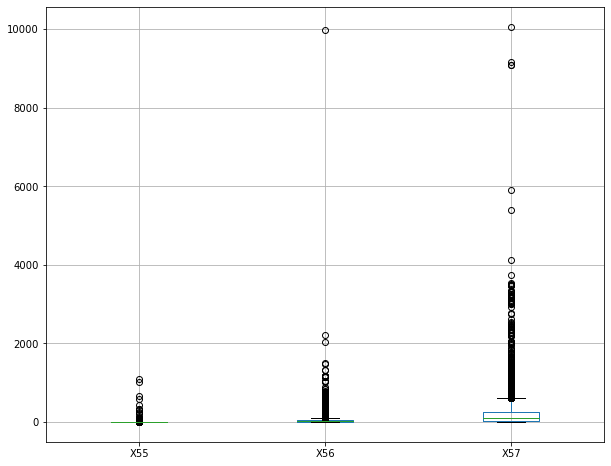

In [30]:
Training_data_copy[["X55","X56","X57"]].boxplot(figsize=(10,8))

In [31]:
# before moove further, first we can check the correlation between outliers containing columns and target var
Training_data_copy.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,...,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600,0.129805
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,...,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016,-0.026476
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,...,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387,0.204965
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,...,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542,0.055609
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,...,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402,0.242400
X6,0.060360,-0.023827,0.093120,-0.008594,0.065459,1.000000,0.074811,0.095892,0.132624,0.015163,...,-0.015690,-0.004675,-0.031567,0.065323,0.104906,0.020024,-0.010804,0.083647,0.086964,0.253613
X7,0.004934,0.006748,0.037979,0.015680,0.157810,0.074811,1.000000,0.047656,0.057607,0.048401,...,-0.035855,-0.049371,-0.035751,0.044416,0.060073,0.043426,0.040228,0.053253,-0.008160,0.327233
X8,0.002262,-0.014461,0.018314,0.004700,0.030440,0.095892,0.047656,1.000000,0.097821,0.085445,...,-0.028603,-0.032195,-0.023941,0.032774,0.052817,-0.009910,0.013975,0.037654,0.046959,0.217332
X9,0.128300,0.000199,0.098008,0.000138,0.023903,0.132624,0.057607,0.097821,1.000000,0.138875,...,-0.014399,-0.030304,0.028297,0.046721,0.160436,-0.003807,0.105594,0.181932,0.276767,0.254297
X10,0.038547,0.035494,0.029760,-0.002183,0.038379,0.015163,0.048401,0.085445,0.138875,1.000000,...,0.013110,0.001187,0.012993,0.038433,0.069121,0.048458,0.068394,0.097029,0.092385,0.138245


In [32]:
# After understanding correlation, we've seen that removing columns is not an good idea, so we will continue with Scaling

### Using Inter Quartile Method and Capping we can handle the outliers

In [33]:
# Function to remove outliers using capping
def remove_outliers(col):
    # Finding IQR
    percentile25 = col.quantile(0.25)
    percentile75 = col.quantile(0.75)
    IQR = percentile75 - percentile25
    upper_lim = percentile75 + 1.5*IQR
    lower_lim = percentile25 - 1.5*IQR

    # Apply Capping
    col = np.where(col > upper_lim, upper_lim,
                               np.where(col < lower_lim, lower_lim, col))
    return col

In [34]:
Training_data_copy['X56'] = remove_outliers(Training_data_copy['X56'])

<AxesSubplot:>

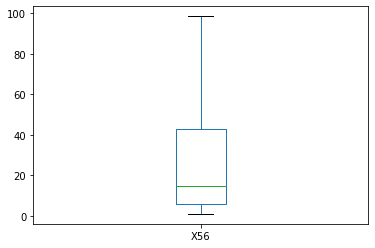

In [35]:
Training_data_copy['X56'].plot(kind='box')

<AxesSubplot:>

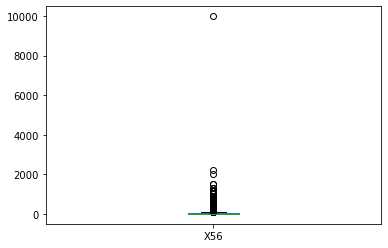

In [36]:
Training_data['X56'].plot(kind='box')

In [37]:
# Handling Outliers using Capping
Training_data_copy['X57'] = remove_outliers(Training_data_copy['X57'])
Training_data_copy['X55'] = remove_outliers(Training_data_copy['X55'])

In [38]:
Training_data_copy.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200000,2.0,12.0,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,6.913875,98.5,375.0,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000000,1.0,5.0,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440000,22.0,122.0,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338000,98.5,207.0,1


In [39]:
x2 = Training_data_copy.iloc[:,0:len(Training_data_copy.columns) - 1]
y2 = Training_data_copy['Y']

In [40]:
y2.head(5)

0    0
1    1
2    0
3    1
4    1
Name: Y, dtype: int64

### Preprocessing - Robust Scaling

#### Why Do I use Robust scaling rather than Standard Scaling
--> Both Standard Scalers and robust scaler transform input to comparable scales. The difference is , std scaler used mena and std dev however Robust scaler uses Median and IQR instead.

In [41]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [42]:
x2 = pd.DataFrame(robust_scaler.fit_transform(x2), columns=x2.columns)

In [43]:
x2.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,10.093023,0.00,0.000000,0.00,0.00,0.00,0.0,0.000000,...,0.0,0.0,-0.351064,0.0,4.230102,0.000000,0.000,-0.498535,-0.351351,-0.358079
1,0.00,0.56,1.302326,0.00,2.890323,0.56,2.25,0.00,0.0,3.294118,...,0.0,0.0,0.090426,0.0,1.585500,0.000000,0.083,2.179948,2.256757,1.227074
2,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.0,0.000000,...,0.0,0.0,-0.351064,0.0,0.000000,0.000000,0.000,-0.592289,-0.378378,-0.388646
3,0.64,0.00,1.488372,0.00,4.980645,0.00,0.00,0.00,0.0,0.000000,...,0.0,0.0,-0.351064,0.0,1.456265,6.851852,0.000,0.082738,0.189189,0.122271
4,0.58,0.00,0.000000,35.46,1.496774,0.00,0.58,0.58,0.0,0.000000,...,0.0,0.0,-0.351064,0.0,0.753349,4.425926,0.000,0.503692,2.256757,0.493450


## PCA for Feature Selection and Extraction

In [44]:
Training_data_copy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200000,2.0,12.0,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,6.913875,98.5,375.0,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000000,1.0,5.0,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440000,22.0,122.0,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338000,98.5,207.0,1


In [45]:
# Apply PCA on Training data
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x2)
x2_pca = pd.DataFrame(data = principalComponents
             , columns = ["Principal_component{}".format(i)for i in range(20)])

In [46]:
x2_pca.head(5)

,Principal_component0,Principal_component1,Principal_component2,Principal_component3,Principal_component4,Principal_component5,Principal_component6,Principal_component7,Principal_component8,Principal_component9,Principal_component10,Principal_component11,Principal_component12,Principal_component13,Principal_component14,Principal_component15,Principal_component16,Principal_component17,Principal_component18,Principal_component19
0,-2.200196,-2.365776,-1.036604,-0.929499,-1.714736,4.016423,-0.694415,-0.801900,-0.228406,-0.262875,-2.752671,0.057012,-6.776983,-4.677805,3.329094,0.040911,-0.852010,-0.116397,-0.191366,-0.149672
1,2.232248,-1.823476,-0.297579,2.516066,-0.892947,1.040343,-1.615252,1.971676,0.146668,0.825653,-1.308578,1.551438,0.264551,-0.122539,-0.460260,0.414671,-0.238015,0.569911,-0.242536,-0.183883
2,20.121068,0.066228,-0.913685,-0.765322,-0.736741,-1.087499,-1.058262,-1.046556,-0.485020,-0.329184,0.419766,-0.687182,0.139942,-0.262814,-0.203505,-0.735822,0.176682,-0.101025,-0.284792,-0.445097
3,-3.966654,9.493344,4.495430,-2.385200,-0.916772,-0.242676,-1.797854,3.510578,-0.518986,-0.555693,0.384379,-0.567227,-0.825001,0.168989,-0.078940,-0.070951,0.583972,-0.792307,-0.179229,0.111650
4,-3.156712,2.862076,2.656065,-1.881735,-1.014351,-0.465570,-1.760087,0.250379,-0.205024,32.508023,12.210817,-5.411260,-3.986271,-0.502969,0.409123,-0.595749,0.812989,-1.000625,0.227508,0.147330


In [47]:
# Apply PCA on Testing data
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents_test = pca.fit_transform(Testing_data_copy)
Test_pca = pd.DataFrame(data = principalComponents_test
             , columns = ["Principal_component{}".format(i)for i in range(20)])

In [48]:
Test_pca.head()

,Principal_component0,Principal_component1,Principal_component2,Principal_component3,Principal_component4,Principal_component5,Principal_component6,Principal_component7,Principal_component8,Principal_component9,Principal_component10,Principal_component11,Principal_component12,Principal_component13,Principal_component14,Principal_component15,Principal_component16,Principal_component17,Principal_component18,Principal_component19
0,-195.577695,4.842641,-3.673841,-0.945706,0.953720,-0.104543,-0.005259,-0.259654,0.133309,-1.461275,0.187417,-0.764392,-0.100267,-0.332501,0.294975,-0.484670,0.357628,0.702412,0.557000,0.198447
1,-29.739488,117.032845,-18.423255,-0.642172,0.997918,-0.129088,0.015996,-0.187651,-0.180515,0.300869,-0.205809,-0.113410,-0.044206,-0.106277,0.772432,0.255520,-0.170534,-0.427379,-0.047799,0.280900
2,2759.011295,2.217503,-14.952338,0.097278,1.852071,-0.452696,-0.092908,0.520197,-0.276331,0.041540,-0.144671,0.045532,-0.275550,0.038645,-0.444156,-0.169940,-0.181516,-0.064100,-0.258857,-0.211963
3,1095.707567,552.966463,-111.884114,1.367448,-1.093609,-0.386018,-0.489247,-0.279923,-0.061940,-0.867925,0.126057,0.052536,-0.245839,-0.058072,0.269059,0.016987,-0.008377,0.024768,0.229350,0.330035
4,-36.491406,-16.740229,5.282515,-0.908727,0.258155,0.294233,-0.168768,-0.523986,-0.355370,0.602862,-0.279300,-0.148999,-0.050359,-0.015846,0.731629,0.164480,-0.319449,-0.446993,0.057477,0.165641


# Applying Model to our Training_data

In [49]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2_pca,y2,test_size=0.3,random_state=20)  

In [50]:
log_reg = LogisticRegression()

In [51]:
log_reg.fit(x2_train,y2_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y2_pred = log_reg.predict(x2_test)

In [53]:
comp_data2 = pd.DataFrame({"Original_Y1":y2_test,
                         "Predicted_Y1":y2_pred})
comp_data2

,Original_Y1,Predicted_Y1
174,0,0
1939,0,0
1423,1,1
3611,0,0
2122,0,0
...,...,...
2812,0,0
197,0,0
540,0,0
422,0,0


In [54]:
cnf_matrix2 = metrics.confusion_matrix(y2_test, y2_pred)
cnf_matrix2

array([[689,  52],
       [ 56, 376]], dtype=int64)

In [55]:
##From the confusion matrix we can see that:

    #True positive predictions: 689
    #True negative predictions: 376
    #False positive predictions: 56
    #False negative predictions: 52

In [56]:
Accuracy_y2 = metrics.accuracy_score(y2_test, y2_pred)
Accuracy_y2

0.907928388746803

#### note: Here we can tune the 2 parameters for checking accuracy at different values of these 2 parameters by Looping\
Parameters are: \
--> principal_components in PCA \
--> random_state in train-test split

# Applying Logistic Regression  Removing Outliers columns and Preprocessing

In [57]:
x3 = Training_data.iloc[:,0:-4]
x3.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54
0,0.0,0.00,4.34,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.0,0.000
1,0.0,0.56,0.56,0.0,1.12,0.56,2.25,0.0,0.0,0.56,...,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.0,0.083
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000


In [58]:
y3 = Training_data['Y']
y3.head(3)

0    0
1    1
2    0
Name: Y, dtype: int64

In [59]:
# Applying PCA for feature selection and extraction

In [60]:
# Robust Scaling
x3 = pd.DataFrame(robust_scaler.fit_transform(x3), columns=x3.columns)

In [61]:
# PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x3)
x3_pca = pd.DataFrame(data = principalComponents
             , columns = ["Principal_component{}".format(i)for i in range(20)])

In [62]:
# Modelling

In [63]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3_pca,y3,test_size=0.3,random_state=0)  

In [64]:
log_reg.fit(x3_train,y3_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y3_pred = log_reg.predict(x3_test)

In [66]:
comp_data3 = pd.DataFrame({"Original_Y1":y3_test,
                         "Predicted_Y1":y3_pred})
comp_data3

,Original_Y1,Predicted_Y1
3538,0,0
192,1,0
2065,1,1
2490,1,1
598,0,0
...,...,...
3213,0,0
601,1,1
2856,0,1
98,1,1


In [67]:
cnf_matrix3 = metrics.confusion_matrix(y3_test, y3_pred)
cnf_matrix3

array([[650,  58],
       [ 39, 426]], dtype=int64)

In [68]:
##From the confusion matrix we can see that:

    #True positive predictions: 650
    #True negative predictions: 426
    #False positive predictions: 39
    #False negative predictions: 58

In [69]:
Accuracy_y3 = metrics.accuracy_score(y3_test, y3_pred)
Accuracy_y3

0.9173060528559249

#### note: Here we can tune the 2 parameters for checking accuracy at different values of these 2 parameters by Looping\
Parameters are: \
--> principal_components in PCA \
--> random_state in train-test split

In [70]:
print('Accuracy Score on raw data',Accuracy_y1)
print('Accuracy Score on Cleaning Outliers data',Accuracy_y2)
print('Accuracy Score on data After Removing outlier columns',Accuracy_y3)

Accuracy Score on raw data 0.9164535379369139
Accuracy Score on Cleaning Outliers data 0.907928388746803
Accuracy Score on data After Removing outlier columns 0.9173060528559249


# Classification Report

In [71]:
from sklearn.metrics import classification_report

In [82]:
print('Classification Report of y1\n',classification_report(np.array(y1_test),y1_pred))

Classification Report of y1
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       691
           1       0.91      0.88      0.90       482

    accuracy                           0.92      1173
   macro avg       0.92      0.91      0.91      1173
weighted avg       0.92      0.92      0.92      1173



In [83]:
print('Classification Report of y2\n',classification_report(np.array(y2_test),y2_pred))

Classification Report of y2
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       741
           1       0.88      0.87      0.87       432

    accuracy                           0.91      1173
   macro avg       0.90      0.90      0.90      1173
weighted avg       0.91      0.91      0.91      1173



In [84]:
print('Classification Report of y3\n',classification_report(np.array(y3_test),y3_pred))

Classification Report of y3
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       708
           1       0.88      0.92      0.90       465

    accuracy                           0.92      1173
   macro avg       0.91      0.92      0.91      1173
weighted avg       0.92      0.92      0.92      1173

